In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [4]:
iris = load_iris()

x = iris.data[:, [2, 3]]

y = iris.target

print(f"X Shape: {x.shape}")
print(f"y Shape: {y.shape}")

X Shape: (150, 2)
y Shape: (150,)


In [5]:
from sklearn.tree import DecisionTreeClassifier

def fit_dt(x, y, max_depth = None, state =13):
    clf = DecisionTreeClassifier(
        max_depth = max_depth,
        random_state = state
    )

    clf.fit(x, y)

    return clf

In [6]:
import numpy as np

def make_mesh(x, n = 300, pad = 0.5):
    x_min, x_max = x[:, 0].min() - pad, x[:, 0].max() + pad
    y_min, y_max = x[:, 1].min() - pad, x[:, 1].max() + pad

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, n),
        np.linspace(y_min, y_max, n)
    )

    return xx, yy

In [7]:
def predict_on_mesh(clf, xx, yy):
    grid = np.c_[xx.ravel(), yy.ravel()]

    z = clf.predict(grid)

    z = z.reshape(xx.shape)

    return z

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boundary(xx, yy, z, x, y):
    plt.figure(figsize=(8, 6))

    plt.contourf(xx, yy, z, alpha = 0.3, cmap = "Set2")

    sns.scatterplot(
        X = x[:, 0], y = x[:, 1],
        hue = y, palette = "Set2",
        edgecolor = 'k'
    )

    plt.xlabel("Petal length (cm)")
    plt.ylabel("Petal width (cm)")
    plt.title("decision Tree")
    plt.show

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boundary(xx, yy, z, x, y):
    plt.figure(figsize=(8, 6))

    plt.contourf(xx, yy, z, alpha = 0.3, cmap = "Set2")

    sns.scatterplot(
        x = x[:, 0], y = x[:, 1],
        hue = y, palette = "Set2",
        edgecolor = 'k'
    )

    plt.xlabel("Petal length (cm)")
    plt.ylabel("Petal width (cm)")
    plt.title("decision Tree")
    plt.show()

In [10]:
clf = fit_dt(x, y, max_depth = None)

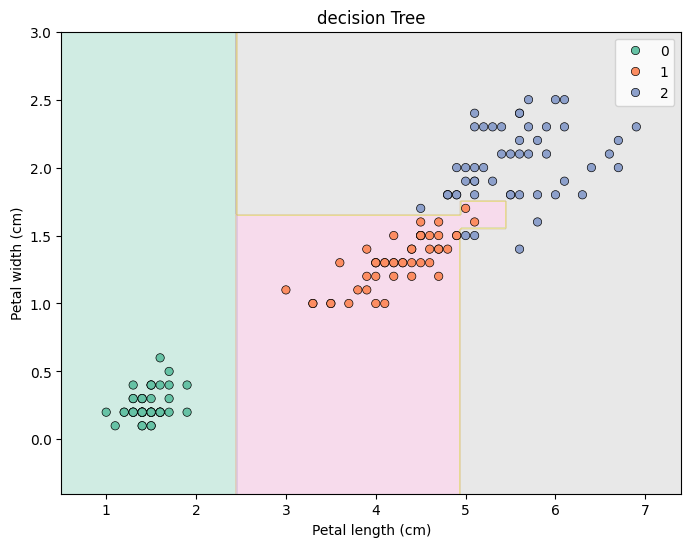

In [13]:
xx, yy = make_mesh(x, n = 300, pad = 0.5)
z = predict_on_mesh(clf, xx, yy)
plot_boundary(xx, yy, z, x, y)

In [14]:
from sklearn.model_selection import train_test_split